## Decision Tree Model

In [300]:
import jenkspy as jenkspy
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.metrics import confusion_matrix, classification_report

In [301]:
from sklearn.tree import DecisionTreeClassifier
df=pd.read_csv('prepared_data.csv')
df



,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,...,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,stroke
0,0.931846,0,1,2.500974,0.859059,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,1
1,1.673346,0,1,-0.056516,0.279850,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,1
2,-0.094846,0,0,1.303993,0.548264,0,0,1,0,0,...,0,1,1,0,0,0,1,0,1,1
3,1.616307,1,0,1.364196,-0.920950,0,0,0,1,0,...,1,0,1,0,0,0,1,1,0,1
4,1.730384,0,0,1.616050,-0.214597,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,-0.551154,0,0,-0.801661,-0.227499,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
4190,-0.608193,0,0,1.718958,0.345098,0,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
4191,-0.323000,1,0,-0.283580,0.402209,1,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
4192,-0.608193,0,0,-0.514394,0.025377,0,0,1,0,0,...,0,1,0,1,0,0,1,1,0,0


In [302]:
train, test = train_test_split(df,test_size=0.2)
train

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,...,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,stroke
121,1.217038,1,0,2.357237,-0.073327,0,0,1,0,0,...,1,0,1,0,0,0,1,0,1,1
602,-0.094846,0,0,0.122219,0.760170,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
638,-1.121539,0,0,-1.111634,0.279850,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2028,0.703692,0,0,-0.618135,-0.271105,0,0,1,0,0,...,1,0,1,0,0,0,1,1,0,0
91,0.133307,0,0,-0.926233,1.551285,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353,1.730384,0,0,-1.054556,-0.384122,0,0,0,1,0,...,1,0,1,0,0,0,1,1,0,0
3555,0.646653,0,0,0.187422,-0.483011,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
1068,0.589615,0,0,-0.704377,0.011436,0,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
909,-0.208923,0,0,-0.909152,0.378739,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


<AxesSubplot:>

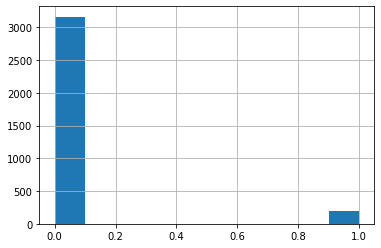

In [303]:
train['stroke'].hist()

### stroke = 1 <<<< stroke =0 => need to add

<AxesSubplot:title={'center':'count (Stroke)'}>

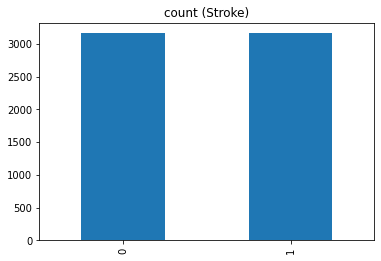

In [304]:
class_count_1, class_count_2 = train['stroke'].value_counts()
#seprate 2 classes of Outcome
class_1 = train[train['stroke'] == 0]
class_2 = train[train['stroke'] == 1]# print the shape of the class
#print('class 1:', class_1.shape)
#print('class 2:', class_2.shape)
class_2_over = class_2.sample(class_count_1, replace=True)
test_over = pd.concat([class_2_over, class_1], axis=0)
#print("total Outcome of 1 and 2:",test_over['Outcome'].value_counts())# plot the count after under-sampeling
test_over['stroke'].value_counts().plot(kind='bar', title='count (Stroke)')

In [305]:
y_train=test_over['stroke']
x_train=test_over.drop(columns='stroke')
x_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
109,1.559269,1,0,0.456357,-1.471905,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1
87,0.361461,0,0,0.039309,-0.285232,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1
51,-0.323000,0,0,-0.310661,-0.045072,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0
4021,1.388153,0,1,0.023894,-0.555782,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1
205,0.361461,0,0,-0.493145,0.873186,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353,1.730384,0,0,-1.054556,-0.384122,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0
3555,0.646653,0,0,0.187422,-0.483011,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0
1068,0.589615,0,0,-0.704377,0.011436,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1
909,-0.208923,0,0,-0.909152,0.378739,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1


<AxesSubplot:>

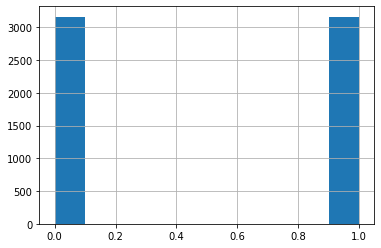

In [306]:
y_train.hist()

In [307]:
y_test=test['stroke']
x_test=test.drop(columns='stroke')
x_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
3332,-0.037808,0,0,-0.102345,0.689534,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1
1201,-1.577846,0,0,-0.890195,-1.274126,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
2580,-0.494116,0,0,-0.411277,0.350485,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1
4015,0.475538,0,0,-0.676671,-0.208046,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0
2296,-0.037808,0,0,0.261165,-0.709044,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3806,-0.094846,1,0,0.222210,-0.016818,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0
4187,0.418500,0,0,-0.493562,-0.129602,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1
1688,-0.094846,0,0,0.127635,-0.822060,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0
1761,0.874807,0,0,0.903819,1.932715,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0


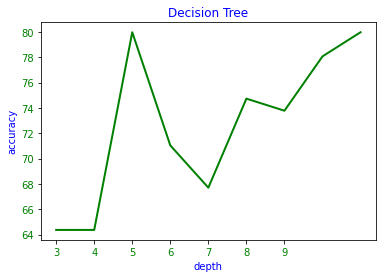

In [308]:
accuracy_list = []
for i in range(1,10):
    DecisionTree = DecisionTreeClassifier(max_depth = i, criterion='gini')
    DecisionTree.fit(x_train, y_train)
    y_pred = DecisionTree.predict(x_test)
    accuracy_list.append(accuracy_score(y_test,y_pred)*100)
plt.figure()
plt.xticks([0,1,2,3,4,5,6],[3,4,5,6,7,8,9])
plt.plot(accuracy_list, color="green", linewidth=2)
plt.xlabel("depth",c="b")
plt.ylabel("accuracy",c="b")
plt.yticks(c= 'green')
plt.xticks(c= 'green')
plt.title("Decision Tree",c="b")
plt.show()

## 9 is the best for max depth

[Text(279.0, 475.65000000000003, 'X[0] <= 0.276\ngini = 0.5\nsamples = 6322\nvalue = [3161, 3161]'),
 Text(139.5, 339.75, 'X[0] <= -0.751\ngini = 0.315\nsamples = 2443\nvalue = [1965, 478]'),
 Text(69.75, 203.85000000000002, 'gini = 0.045\nsamples = 910\nvalue = [889, 21]'),
 Text(209.25, 203.85000000000002, 'gini = 0.418\nsamples = 1533\nvalue = [1076, 457]'),
 Text(418.5, 339.75, 'X[0] <= 1.303\ngini = 0.427\nsamples = 3879\nvalue = [1196, 2683]'),
 Text(348.75, 203.85000000000002, 'X[3] <= 0.038\ngini = 0.479\nsamples = 2073\nvalue = [823, 1250]'),
 Text(279.0, 67.94999999999999, 'gini = 0.497\nsamples = 1008\nvalue = [543, 465]'),
 Text(418.5, 67.94999999999999, 'gini = 0.388\nsamples = 1065\nvalue = [280, 785]'),
 Text(488.25, 203.85000000000002, 'gini = 0.328\nsamples = 1806\nvalue = [373, 1433]')]

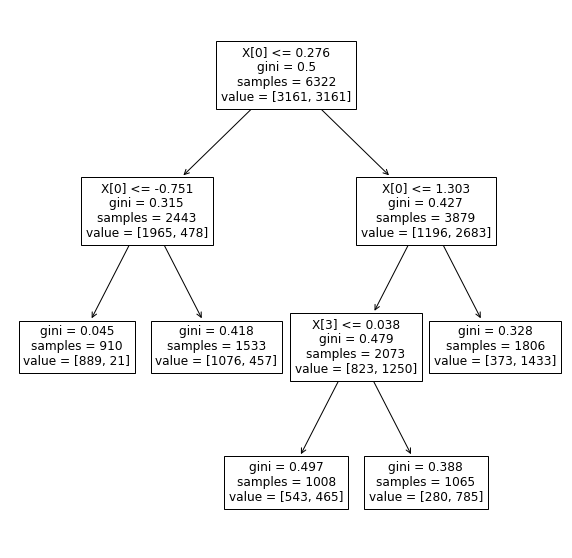

In [309]:


DT = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=5,max_depth=9).fit(x_train,y_train)
fig, axs = plt.subplots(1, 1, figsize=(10,10))
tree.plot_tree(DT, ax=axs)

[Text(186.0, 489.24, 'X[0] <= 1.017\ngini = 0.118\nsamples = 839\nvalue = [786, 53]'),
 Text(93.0, 380.52000000000004, 'gini = 0.062\nsamples = 690\nvalue = [668, 22]'),
 Text(279.0, 380.52000000000004, 'X[7] <= 0.5\ngini = 0.33\nsamples = 149\nvalue = [118, 31]'),
 Text(186.0, 271.8, 'gini = 0.221\nsamples = 79\nvalue = [69, 10]'),
 Text(372.0, 271.8, 'X[3] <= 2.668\ngini = 0.42\nsamples = 70\nvalue = [49, 21]'),
 Text(279.0, 163.08000000000004, 'X[3] <= 1.704\ngini = 0.386\nsamples = 65\nvalue = [48, 17]'),
 Text(186.0, 54.360000000000014, 'gini = 0.444\nsamples = 48\nvalue = [32, 16]'),
 Text(372.0, 54.360000000000014, 'gini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(465.0, 163.08000000000004, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]')]

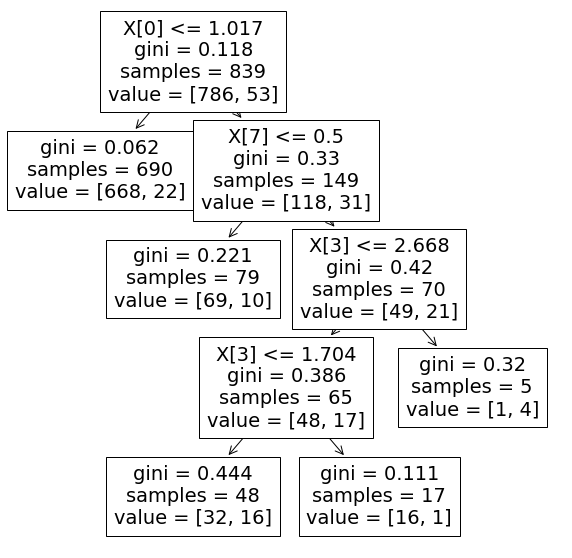

In [310]:


DT_test = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=5,max_depth=9).fit(x_test,y_test)
fig1,axs1 = plt.subplots(1, 1, figsize=(10,10))
tree.plot_tree(DT_test, ax=axs1)

In [311]:
y_pred = DT.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.7890345649582837

## classification report

In [312]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.80      0.88       786
           1       0.16      0.57      0.25        53

    accuracy                           0.79       839
   macro avg       0.56      0.69      0.57       839
weighted avg       0.91      0.79      0.84       839



### ٍ Let's test Entropy

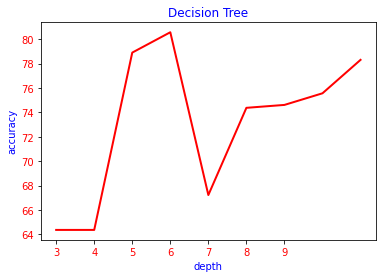

In [313]:
accuracy_list = []
for i in range(1,10):
    DecisionTree = DecisionTreeClassifier(max_depth = i, criterion="entropy")
    DecisionTree.fit(x_train, y_train)
    y_pred = DecisionTree.predict(x_test)
    accuracy_list.append(accuracy_score(y_test,y_pred)*100)
plt.figure()
plt.xticks([0,1,2,3,4,5,6],[3,4,5,6,7,8,9])
plt.plot(accuracy_list, color="r", linewidth=2)
plt.xlabel("depth",c="b")
plt.ylabel("accuracy",c="b")
plt.yticks(c= 'r')
plt.xticks(c= 'r')
plt.title("Decision Tree",c="b")
plt.show()

## 5 is the best for max depth

[Text(279.0, 475.65000000000003, 'X[0] <= 0.276\nentropy = 1.0\nsamples = 6322\nvalue = [3161, 3161]'),
 Text(139.5, 339.75, 'X[0] <= -0.751\nentropy = 0.713\nsamples = 2443\nvalue = [1965, 478]'),
 Text(69.75, 203.85000000000002, 'entropy = 0.158\nsamples = 910\nvalue = [889, 21]'),
 Text(209.25, 203.85000000000002, 'entropy = 0.879\nsamples = 1533\nvalue = [1076, 457]'),
 Text(418.5, 339.75, 'X[0] <= 1.303\nentropy = 0.891\nsamples = 3879\nvalue = [1196, 2683]'),
 Text(348.75, 203.85000000000002, 'X[3] <= 0.038\nentropy = 0.969\nsamples = 2073\nvalue = [823, 1250]'),
 Text(279.0, 67.94999999999999, 'entropy = 0.996\nsamples = 1008\nvalue = [543, 465]'),
 Text(418.5, 67.94999999999999, 'entropy = 0.831\nsamples = 1065\nvalue = [280, 785]'),
 Text(488.25, 203.85000000000002, 'entropy = 0.735\nsamples = 1806\nvalue = [373, 1433]')]

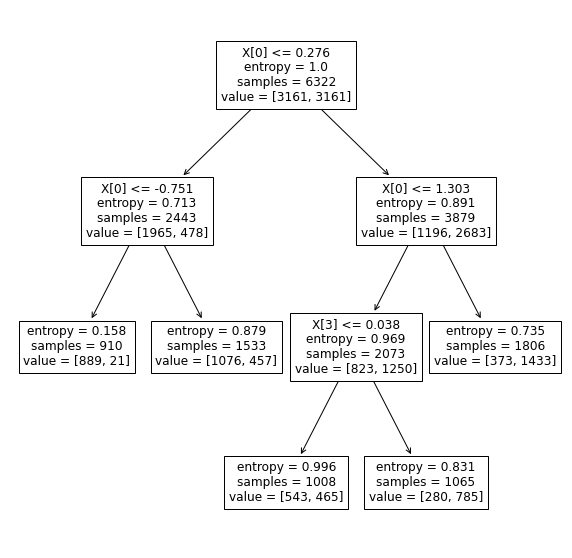

In [314]:


DT = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes=5,max_depth=10).fit(x_train,y_train)
fig, axs = plt.subplots(1, 1, figsize=(10,10))
tree.plot_tree(DT, ax=axs)

[Text(248.0, 475.65000000000003, 'X[0] <= 0.39\nentropy = 0.34\nsamples = 839\nvalue = [786, 53]'),
 Text(124.0, 339.75, 'X[0] <= -0.694\nentropy = 0.133\nsamples = 538\nvalue = [528, 10]'),
 Text(62.0, 203.85000000000002, 'entropy = 0.0\nsamples = 241\nvalue = [241, 0]'),
 Text(186.0, 203.85000000000002, 'entropy = 0.212\nsamples = 297\nvalue = [287, 10]'),
 Text(372.0, 339.75, 'X[0] <= 1.017\nentropy = 0.592\nsamples = 301\nvalue = [258, 43]'),
 Text(310.0, 203.85000000000002, 'entropy = 0.398\nsamples = 152\nvalue = [140, 12]'),
 Text(434.0, 203.85000000000002, 'X[7] <= 0.5\nentropy = 0.738\nsamples = 149\nvalue = [118, 31]'),
 Text(372.0, 67.94999999999999, 'entropy = 0.548\nsamples = 79\nvalue = [69, 10]'),
 Text(496.0, 67.94999999999999, 'entropy = 0.881\nsamples = 70\nvalue = [49, 21]')]

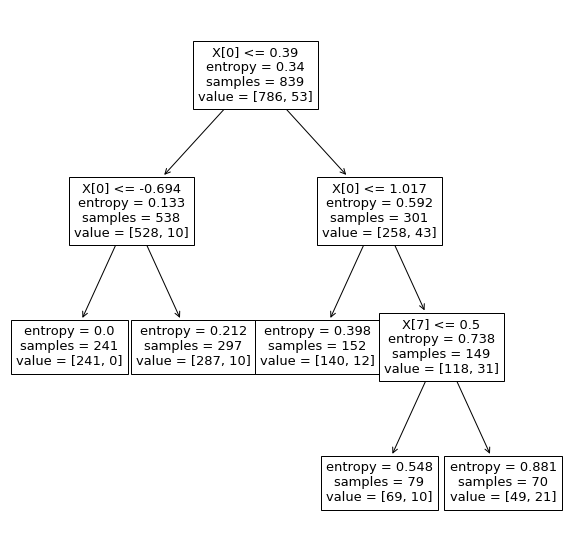

In [315]:


DT_test = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes=5,max_depth=10).fit(x_test,y_test)
fig1,axs1 = plt.subplots(1, 1, figsize=(10,10))
tree.plot_tree(DT_test, ax=axs1)

In [316]:
y_pred = DT.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.7890345649582837

## classification report for entropy

In [317]:
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.96      0.80      0.88       786
           1       0.16      0.57      0.25        53

    accuracy                           0.79       839
   macro avg       0.56      0.69      0.57       839
weighted avg       0.91      0.79      0.84       839

